## The Problem Statement :-  

#### To predict the person will get affected by diabetes or not with the  help of given independent features .

### Importing all the needful libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report , r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

 Importing the data in dataframe .

In [2]:
df=pd.read_csv("diabetes_data.csv")


In [3]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

### Data Description . 

The taken data is all about the diabetes scenario related in this dataset i got the 70,000 records, all the data is present in numeric format so there is no need to do the encoding and also there is no null values in the dataset .   

In [5]:
df["Diabetes"].value_counts()

0.0    35346
1.0    35346
Name: Diabetes, dtype: int64

### The dependent feature or output column is perfectely balanced , and we have binary outcomes 

In [6]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


### Performing EDA to get only necessary data .

In [7]:
df.drop(columns=["CholCheck","PhysActivity","Fruits","Fruits","HvyAlcoholConsump","DiffWalk","Stroke"],inplace=True)

In [8]:
df.head()

,Age,Sex,HighChol,BMI,Smoker,HeartDiseaseorAttack,Veggies,GenHlth,MentHlth,PhysHlth,HighBP,Diabetes
0,4.0,1.0,0.0,26.0,0.0,0.0,1.0,3.0,5.0,30.0,1.0,0.0
1,12.0,1.0,1.0,26.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0
2,13.0,1.0,0.0,26.0,0.0,0.0,1.0,1.0,0.0,10.0,0.0,0.0
3,11.0,1.0,1.0,28.0,1.0,0.0,1.0,3.0,0.0,3.0,1.0,0.0
4,8.0,0.0,0.0,29.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Density')

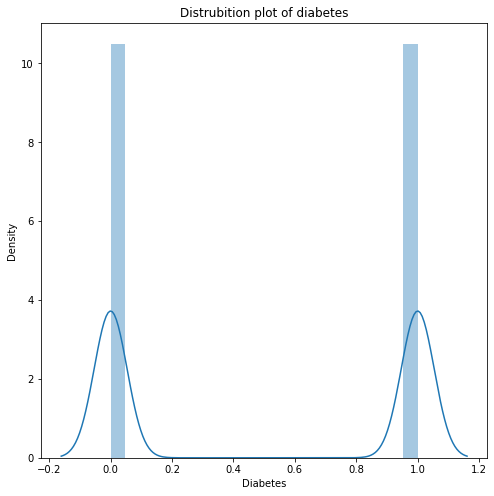

In [9]:
plt.figure(figsize=(8,8))
plt.title("Distrubition plot of diabetes")
sns.distplot(df["Diabetes"])
plt.xlabel("Diabetes")
plt.ylabel("Density")

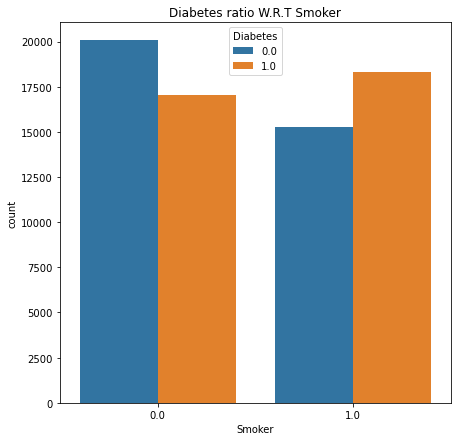

In [65]:
plt.figure(figsize=(7,7))
plt.title("Diabetes ratio W.R.T Smoker")
sns.countplot(x="Smoker",hue="Diabetes",data=df)
plt.xlabel("Smoker")
plt.show()

In [11]:
df["Smoker"].value_counts()

0.0    37094
1.0    33598
Name: Smoker, dtype: int64

As we can see from the above graph ratio of smokers is directely proportional to ratio of diabetes will caused . 

### Outliers cheking in target variable .

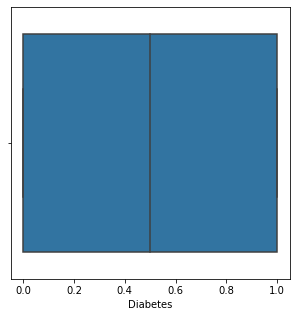

In [12]:
plt.figure(figsize=(5,5))
sns.boxplot(df.Diabetes)
plt.show()

### As we can see the data is prefectely balanced so there is no outliers present in the dataset .

Splitting the data in x and y for the training and testing process .

#### What are the independent features ? 

Here all the features taken below i considered as my independent features and i have store that data in dataframe and labelled it as x .

In [13]:
x=df.iloc[:,:-1]
x

,Age,Sex,HighChol,BMI,Smoker,HeartDiseaseorAttack,Veggies,GenHlth,MentHlth,PhysHlth,HighBP
0,4.0,1.0,0.0,26.0,0.0,0.0,1.0,3.0,5.0,30.0,1.0
1,12.0,1.0,1.0,26.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0
2,13.0,1.0,0.0,26.0,0.0,0.0,1.0,1.0,0.0,10.0,0.0
3,11.0,1.0,1.0,28.0,1.0,0.0,1.0,3.0,0.0,3.0,1.0
4,8.0,0.0,0.0,29.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,37.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0
70688,10.0,1.0,1.0,29.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0
70689,13.0,0.0,1.0,25.0,0.0,1.0,0.0,5.0,15.0,0.0,1.0
70690,11.0,0.0,1.0,18.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0


#### What is the target variable ? 

Here i took diabetes is my target variable , it has the data that shows that person will get affected by diabetes or not .

In [14]:
y=df.iloc[:,-1]
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
70687    1.0
70688    1.0
70689    1.0
70690    1.0
70691    1.0
Name: Diabetes, Length: 70692, dtype: float64

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [16]:
xtrain

,Age,Sex,HighChol,BMI,Smoker,HeartDiseaseorAttack,Veggies,GenHlth,MentHlth,PhysHlth,HighBP
7295,9.0,0.0,0.0,24.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0
44106,7.0,1.0,1.0,36.0,1.0,1.0,1.0,4.0,10.0,0.0,1.0
50743,9.0,1.0,1.0,27.0,1.0,1.0,1.0,5.0,25.0,30.0,1.0
29129,9.0,0.0,1.0,29.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0
63691,8.0,1.0,0.0,32.0,1.0,0.0,1.0,3.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
49100,11.0,1.0,1.0,31.0,0.0,0.0,1.0,2.0,1.0,30.0,1.0
20609,10.0,0.0,1.0,27.0,0.0,0.0,1.0,2.0,3.0,10.0,1.0
21440,4.0,0.0,0.0,19.0,0.0,0.0,1.0,2.0,5.0,0.0,0.0
50057,10.0,1.0,1.0,39.0,1.0,0.0,1.0,1.0,0.0,3.0,1.0


In [17]:
ytest

25002    0.0
45944    1.0
23894    0.0
6931     0.0
39255    1.0
        ... 
62249    1.0
5977     0.0
16357    0.0
35003    0.0
36622    1.0
Name: Diabetes, Length: 21208, dtype: float64

### Creating the object of all the models .

In [18]:
dt=DecisionTreeClassifier()
svm=SVC()
lrg=LogisticRegression()
knn=KNeighborsClassifier()

### Creating the function to execute all the models easily .

In [19]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))

### Executing the function with respective models object to get the classification report .

In [20]:
mymodel(dt)

              precision    recall  f1-score   support

         0.0       0.65      0.69      0.67     10681
         1.0       0.67      0.62      0.64     10527

    accuracy                           0.66     21208
   macro avg       0.66      0.66      0.66     21208
weighted avg       0.66      0.66      0.66     21208



In [21]:
mymodel(lrg)

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     10681
         1.0       0.73      0.76      0.75     10527

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



In [22]:
mymodel(knn)

              precision    recall  f1-score   support

         0.0       0.71      0.68      0.70     10681
         1.0       0.69      0.72      0.70     10527

    accuracy                           0.70     21208
   macro avg       0.70      0.70      0.70     21208
weighted avg       0.70      0.70      0.70     21208



In [23]:
mymodel(svm)

              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73     10681
         1.0       0.72      0.81      0.76     10527

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



### Hypertuning the Logisticregression model

In [24]:
lrg = LogisticRegression(solver="liblinear")
lrg.fit(xtrain,ytrain)
ypred=lrg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     10681
         1.0       0.73      0.76      0.75     10527

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



### Feature scaling for better prediction .

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [26]:
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [27]:
lrg = LogisticRegression(solver="saga")
lrg.fit(xtrain,ytrain)
ypred=lrg.predict(xtest)

In [28]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     10681
         1.0       0.73      0.76      0.75     10527

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



In [29]:
train_score=lrg.score(xtrain,ytrain)
test_score=lrg.score(xtest,ytest)

In [30]:
train_score

0.7444022310241695

In [31]:
test_score

0.7458034703885327

### We are getting that much accuracy with logisticregression in this dataset .

## Hypertuning the Knn Model .

In [32]:
ac_list=[]
for i in range(60,70):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    ac_list.append(ac)

In [33]:
ac_list

[0.7424085250848736,
 0.7423613730667673,
 0.7425971331572991,
 0.7433987174651076,
 0.743587325537533,
 0.7432572614107884,
 0.7428800452659374,
 0.7433987174651076,
 0.7433987174651076,
 0.7433987174651076]

### The best value for k is 63

### Again Building the knn model with best k value  ( Final Model of knn)

In [34]:
knn=KNeighborsClassifier(n_neighbors=63)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73     10681
         1.0       0.72      0.79      0.75     10527

    accuracy                           0.74     21208
   macro avg       0.75      0.74      0.74     21208
weighted avg       0.75      0.74      0.74     21208



In [35]:
train_score_knn = knn.score(xtrain,ytrain)
test_score_knn = knn.score(xtest,ytest)

In [36]:
train_score_knn

0.7495554118502951

In [37]:
test_score_knn

0.7433987174651076

### Hypertuning the decision tree model .

In [38]:
for i in range (1,50):
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(xtrain,ytrain)
    ypred=dt2.predict(xtest)
    print(f"{i}= {accuracy_score(ytest,ypred)}")

1= 0.6902112410411165
2= 0.702329309694455
3= 0.7122312334967936
4= 0.7305733685401735
5= 0.7348642021878536
6= 0.7394379479441721
7= 0.7427857412297246
8= 0.7428800452659374
9= 0.7393436439079593
10= 0.7361373066767257
11= 0.7322236891738967
12= 0.7241606940777066
13= 0.7121840814786873
14= 0.7062900792153904
15= 0.691908713692946
16= 0.6817238777819691
17= 0.6778574122972463
18= 0.6727178423236515
19= 0.665739343643908
20= 0.6616842700867597
21= 0.6620614862316108
22= 0.660081101471143
23= 0.6588079969822709
24= 0.6593738211995473
25= 0.6611655978875896
26= 0.6582421727649943
27= 0.6579121086382497
28= 0.6575348924933987
29= 0.6579592606563561
30= 0.6572991324028669
31= 0.6580064126744625
32= 0.6597981893625047
33= 0.6576291965296115
34= 0.6567804602036967
35= 0.6584779328555262
36= 0.6590437570728027
37= 0.6584307808374198
38= 0.6573462844209732
39= 0.6580535646925688
40= 0.6589966050546964
41= 0.6580064126744625
42= 0.6600339494530366
43= 0.6587608449641644
44= 0.6594209732176537
4

#### As we get the best value of max_depth is 8 .

In [39]:
for i in range (1,70):
    dt3=DecisionTreeClassifier(min_samples_leaf=i)
    dt3.fit(xtrain,ytrain)
    ypred=dt3.predict(xtest)
    print(f"{i}= {accuracy_score(ytest,ypred)}")

1= 0.6586665409279517
2= 0.6614485099962278
3= 0.6796020369671822
4= 0.6837985665786496
5= 0.6918144096567334
6= 0.6967182195397963
7= 0.7011976612599019
8= 0.7052527348170502
9= 0.7106280648811769
10= 0.71175971331573
11= 0.7157676348547718
12= 0.7161448509996228
13= 0.7193040362127499
14= 0.71982270841192
15= 0.7219445492267069
16= 0.7246793662768767
17= 0.7271312712184081
18= 0.7285458317615994
19= 0.7284515277253867
20= 0.7288287438702377
21= 0.7302904564315352
22= 0.7324594492644285
23= 0.7326952093549604
24= 0.7330724254998114
25= 0.7341097698981517
26= 0.7345812900792154
27= 0.7340626178800452
28= 0.7347698981516408
29= 0.734534138061109
30= 0.7334967936627688
31= 0.734534138061109
32= 0.735665786495662
33= 0.7351471142964919
34= 0.7349585062240664
35= 0.7353828743870238
36= 0.7363730667672577
37= 0.736420218785364
38= 0.7370803470388533
39= 0.738306299509619
40= 0.7370331950207469
41= 0.7370331950207469
42= 0.7383534515277254
43= 0.7382591474915127
44= 0.73868351565447
45= 0.73

#### The maximum value of min_sample_leaf is 67 . 

## Building the model with criterion gini with best max_depth and min_sample_leaf value .

In [40]:
dt4=DecisionTreeClassifier(max_depth=8, min_samples_leaf=67)
mymodel(dt4)

              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73     10681
         1.0       0.72      0.80      0.76     10527

    accuracy                           0.74     21208
   macro avg       0.75      0.74      0.74     21208
weighted avg       0.75      0.74      0.74     21208



In [41]:
train_score_dt = dt4.score(xtrain,ytrain)
test_score_dt = dt4.score(xtest,ytest)

In [42]:
train_score_dt

0.7476760164901787

In [43]:
test_score_dt

0.743587325537533

### Hypertuning the best max_depth value when criterion is entropy .

In [44]:
for i in range(1,30):
    dt5=DecisionTreeClassifier(criterion="entropy",max_depth=i)
    dt5.fit(xtrain,ytrain)
    ypred=dt5.predict(xtest)
    print(f"{i}= {accuracy_score(ytest,ypred)}")

1= 0.6902112410411165
2= 0.702329309694455
3= 0.7122312334967936
4= 0.7305733685401735
5= 0.7348642021878536
6= 0.7393907959260656
7= 0.7429271972840438
8= 0.7416069407770652
9= 0.7400980761976612
10= 0.7370331950207469
11= 0.7335439456808751
12= 0.727225575254621
13= 0.7167106752168992
14= 0.7102036967182196
15= 0.7014805733685402
16= 0.6943606186344775
17= 0.6873349679366277
18= 0.680827989437948
19= 0.6750754432289702
20= 0.6726235382874387
21= 0.668002640513014
22= 0.6688513768389287
23= 0.6669181440965674
24= 0.6656450396076952
25= 0.6660694077706526
26= 0.663098830629951
27= 0.6647019992455677
28= 0.6639004149377593
29= 0.6627687665032064


### The best value of max depth when criterion is entropy we get 7.

### Now hypertuning the best value of  min_sample_leaf when criterion is entropy .

In [45]:
for i in range(40,90):
    dt6=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=i)
    dt6.fit(xtrain,ytrain)
    ypred=dt6.predict(xtest)
    print(f"{i}= {accuracy_score(ytest,ypred)}")

40= 0.7372218030931724
41= 0.7373632591474916
42= 0.7385420596001508
43= 0.7384477555639382
44= 0.7387306676725763
45= 0.7387306676725763
46= 0.7385892116182573
47= 0.7392021878536401
48= 0.7403338362881932
49= 0.7403338362881932
50= 0.7398623161071294
51= 0.7399094681252357
52= 0.7405224443606186
53= 0.7404752923425123
54= 0.7406639004149378
55= 0.7401452282157677
56= 0.7408996605054696
57= 0.7404281403244058
58= 0.740569596378725
59= 0.7413240286684271
60= 0.7412768766503206
61= 0.7412768766503206
62= 0.7409939645416824
63= 0.7421256129762354
64= 0.7417483968313844
65= 0.7419841569219162
66= 0.7426442851754055
67= 0.7429743493021501
68= 0.7425971331572991
69= 0.7425971331572991
70= 0.7430215013202565
71= 0.7430215013202565
72= 0.7434458694832139
73= 0.7436816295737457
74= 0.7435401735194266
75= 0.7435401735194266
76= 0.7434930215013202
77= 0.7438702376461712
78= 0.7437759336099585
79= 0.7432101093926821
80= 0.7432101093926821
81= 0.7440116937004904
82= 0.7441531497548095
83= 0.744341

### The best value of min_sample_leaf when criterion is entropy is 48 .

## Building the final model of criterion is entropy with best values of max_depth and min_sample_leaf .

In [46]:
dt7=DecisionTreeClassifier(criterion="entropy",max_depth=7,min_samples_leaf=48)
mymodel(dt7)

              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74     10681
         1.0       0.73      0.77      0.75     10527

    accuracy                           0.74     21208
   macro avg       0.75      0.75      0.74     21208
weighted avg       0.75      0.74      0.74     21208



### Hypertuning the svm model .

In [47]:
mymodel(svm)

              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73     10681
         1.0       0.72      0.80      0.76     10527

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.74     21208
weighted avg       0.75      0.75      0.74     21208



In [48]:
train_score_svm = svm.score(xtrain,ytrain)
test_score_svm = svm.score(xtest,ytest)

In [49]:
train_score_svm

0.7509093848516692

In [50]:
test_score_svm

0.7455205582798944

In [51]:
svm2=SVC(kernel="linear")
mymodel(svm2)

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74     10681
         1.0       0.72      0.79      0.75     10527

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.74     21208
weighted avg       0.75      0.75      0.74     21208



In [52]:
svm3=SVC(kernel="poly")
mymodel(svm3)

              precision    recall  f1-score   support

         0.0       0.77      0.68      0.73     10681
         1.0       0.71      0.80      0.75     10527

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



As we are getting the same accuracy on svm with default kernal as well as linear kernal , so i am considering default as best model .

In the scenario of disease we considers the high recall for getting good prediction , so the final model on this dataset with good accuracy and high recall score is support vector machine (svm) . 

svm gives us the high recall score is 80 % and the overall accuraccy of that model is 75 % .

In [59]:
df.head()

,Age,Sex,HighChol,BMI,Smoker,HeartDiseaseorAttack,Veggies,GenHlth,MentHlth,PhysHlth,HighBP,Diabetes
0,4.0,1.0,0.0,26.0,0.0,0.0,1.0,3.0,5.0,30.0,1.0,0.0
1,12.0,1.0,1.0,26.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0
2,13.0,1.0,0.0,26.0,0.0,0.0,1.0,1.0,0.0,10.0,0.0,0.0
3,11.0,1.0,1.0,28.0,1.0,0.0,1.0,3.0,0.0,3.0,1.0,0.0
4,8.0,0.0,0.0,29.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0


In [62]:
svm.predict([[19,1,0,29,1,0,0,3,4,11,1]])

array([1.])

In this random prediction we got the prediction that we will get diabetes.

In [64]:
svm.predict([[25,0,1,33,0,0,1,3,3,20,0]])

array([1.])

These are some random predictions to check the predictive power .